In [1]:

import numpy as np
import pandas as pd
import os
import pandas as pd

In [2]:
def collect_data(path):
    
    csv_datas = os.listdir(path)
    if ".DS_Store" in csv_datas:
        csv_datas.remove(".DS_Store")

    return csv_datas

In [3]:
all_data = collect_data("part_teeth/lower")
len(all_data)

3000

In [4]:

csv_class14 = []
for name in all_data:
    target = max(pd.read_csv("part_teeth/lower/"+name)["label"])
    if target <= 14:
        csv_class14.append("part_teeth/lower/"+name)

csv_class14

['part_teeth/lower/O52P1SZT_lower_2.csv',
 'part_teeth/lower/653MMYW8_lower_3.csv',
 'part_teeth/lower/ZK06H6RE_lower_1.csv',
 'part_teeth/lower/I004CBAW_lower_4.csv',
 'part_teeth/lower/01KEV6ET_lower_1.csv',
 'part_teeth/lower/LPISNMTY_lower_4.csv',
 'part_teeth/lower/B7ZCYID1_lower_2.csv',
 'part_teeth/lower/SZQ66Y5A_lower_2.csv',
 'part_teeth/lower/ODC3F7X8_lower_4.csv',
 'part_teeth/lower/ULCJXQS5_lower_1.csv',
 'part_teeth/lower/MXWH2ZXJ_lower_4.csv',
 'part_teeth/lower/0177JSNX_lower_1.csv',
 'part_teeth/lower/78WMB1PB_lower_4.csv',
 'part_teeth/lower/IBG3DGZJ_lower_3.csv',
 'part_teeth/lower/QPYE7NOP_lower_1.csv',
 'part_teeth/lower/AVI68NCT_lower_4.csv',
 'part_teeth/lower/IF1GKK1E_lower_2.csv',
 'part_teeth/lower/014Z1E5D_lower_3.csv',
 'part_teeth/lower/0175MHGN_lower_3.csv',
 'part_teeth/lower/01J07922_lower_1.csv',
 'part_teeth/lower/MX0PKG9L_lower_2.csv',
 'part_teeth/lower/552HVG7E_lower_4.csv',
 'part_teeth/lower/Q3NA514X_lower_4.csv',
 'part_teeth/lower/TZ2JPAJT_lower_

In [5]:
csv_14 = pd.DataFrame()
csv_14["path"] = csv_class14
csv_14.to_csv("data_14.csv", index=False)
print(csv_14.shape)
csv_14.head()

(2919, 1)


,path
0,part_teeth/lower/O52P1SZT_lower_2.csv
1,part_teeth/lower/653MMYW8_lower_3.csv
2,part_teeth/lower/ZK06H6RE_lower_1.csv
3,part_teeth/lower/I004CBAW_lower_4.csv
4,part_teeth/lower/01KEV6ET_lower_1.csv


In [94]:
def rotate_point_cloud(data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotation_angle = np.random.uniform(-0.5, 0.5) *  np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    rotation_matrix = np.array([[cosval, 0, sinval],
                                [0, 1, 0],
                                [-sinval, 0, cosval]])
    rotated_data = np.dot(data.reshape((-1, 3)), rotation_matrix)
    rotated_data = np.asarray(rotated_data, dtype=np.float32)

    return rotated_data

In [76]:
def rotate_point_cloud_z(data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          Nx3 array, original  point clouds
        Return:
          Nx3 array, rotated  point clouds
    """
    rotation_angle = np.random.uniform(-0.5, 0.5) * 2 * np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    rotation_matrix = np.array([[cosval, sinval, 0],
                                [-sinval, cosval, 0],
                                [0, 0, 1]])

    rotated_data= np.dot(data.reshape((-1, 3)), rotation_matrix)
    rotated_data = np.asarray(rotated_data, dtype=np.float32)
    return rotated_data

In [2]:
def normalize_pc(points):
    centroid = np.mean(points, axis=0)
    points -= centroid
    furthest_distance = np.max(np.sqrt(np.sum(abs(points)**2,axis=-1)))
    points /= furthest_distance
    return points

In [11]:
data = pd.read_csv("part_teeth/lower/00OMSZGW_lower_1.csv")
points = normalize_pc(data[['x', 'y', 'z']].values)
label = data['label'].to_list()

print(set(label))

{0, 9, 11, 13}


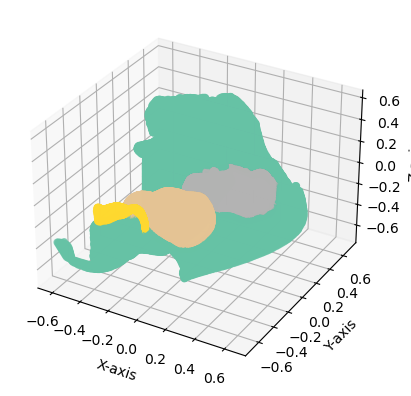

In [12]:
import matplotlib.pyplot as plt

# Assuming 'points' is your point cloud data
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=label, marker='o', cmap=plt.cm.Set2)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

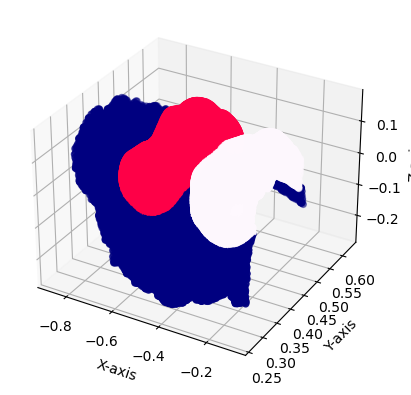

In [123]:
import matplotlib.pyplot as plt
augpoints = rotate_point_cloud_z(points)
# Assuming 'points' is your point cloud data
x = augpoints[:, 0]
y = augpoints[:, 1]
z = augpoints[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=label, marker='o', cmap=plt.cm.gist_ncar)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()